# **Modelo de PATTERN MINING**

**La problemática del proyecto es: Las pérdidas económicas en la agricultura como consecuencia de la mala gestión del cultivo de productos alimenticios, generada por una mala planificación de los cultivos durante el proceso de siembra.**




**El objetivo general del proyecto es: Implementar SmartAgro, un sistema que utiliza la minería de patrones y la simulación de cultivos para dar recomendaciones que coadyuven a la mejor toma de decisiones que permitan disminuir las pérdidas económicas en el sector agrícola en el Perú.** 

Importar Librerias:

In [ ]:
# Instalat pyFim
!pip install https://bit.ly/3o4smsZ

from fim import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 
from graphviz import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 343 kB 9.5 MB/s 
  Created wheel for fim: filename=fim-6.27-cp37-cp37m-linux_x86_64.whl size=523504 sha256=553d85f4afa6dbaf1d4d7feed13119efc441f528fca5e6ef0e0aa25dc6344757
  Stored in directory: /tmp/pip-ephem-wheel-cache-04lmdi4z/wheels/71/84/bf/c9f96714839ef275ecaa4ba1a0cbd3c6dd20931a451e13ba1d
Successfully built fim


In [ ]:
import time

## **1) Preprocesamiento de los Datos**

### 1.1. Cargar dataset

Función para cargar el dataset desde la página de datos abiertos del govierno

In [ ]:
def cargar_dataset():
    # Cargar Dataset:
    df_siembra = pd.read_excel("https://www.datosabiertos.gob.pe/node/6920/download")
    return df_siembra

In [ ]:
data = cargar_dataset()
data.head(5)

,DEPARTAMENTO,PROVINICA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL
0,ANCASH,AIJA,SUCCHA,Papa nativa,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
1,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
2,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
3,ANCASH,ANTONIO RAYMONDI,ACZO,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
4,ANCASH,ANTONIO RAYMONDI,CHINGAS,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0


### 1.2. Modificar dataset

Función que modifica el dataset, se cambia el nombre de algunas columnas y se eliminan columnas innecesarias

In [ ]:
def modificar_dataset(df_siembra):
    # Renombrar Columnas:
    df_siembra.rename(columns={'PROVINICA':'PROVINCIA'}, inplace=True)
    # Modificar Dataset:
    df_siembra_freq = df_siembra.copy()
    df_siembra_freq['DISTRITO'] = df_siembra_freq['DEPARTAMENTO']+'-'+df_siembra_freq['PROVINCIA']+'-'+df_siembra_freq['DISTRITO']
    # Eliminar Columnas Inecesarias:
    df_siembra_freq = df_siembra_freq[['DISTRITO','CULTIVO']]
    df_siembra_freq = df_siembra_freq.drop_duplicates()
    return df_siembra_freq

In [ ]:
dataset = modificar_dataset(data)
dataset.head(5)

,DISTRITO,CULTIVO
0,ANCASH-AIJA-SUCCHA,Papa nativa
1,ANCASH-ANTONIO RAYMONDI-LLAMELLIN,Olluco
2,ANCASH-ANTONIO RAYMONDI-LLAMELLIN,Quinua
3,ANCASH-ANTONIO RAYMONDI-ACZO,Quinua
4,ANCASH-ANTONIO RAYMONDI-CHINGAS,Olluco


In [ ]:
print('Hay {} cultivos diferentes'.format(len(dataset['CULTIVO'].unique())))
dataset['CULTIVO'].unique()

Hay 26 cultivos diferentes


array(['Papa nativa', 'Olluco', 'Quinua', 'Papa color',
       'Frijol grano seco', 'Arveja grano seco', 'Arveja grano verde',
       'Zapallo', 'Cebada grano', 'Tomate', 'Papa blanca',
       'Maiz amarillo duro', 'Cebolla cabeza roja', 'Aji', 'Trigo',
       'Haba grano seco', 'Yuca', 'Zanahoria', 'Maiz choclo',
       'Maiz amilaceo', 'Ajo', 'Camote', 'Arroz cascara', 'Algodon',
       'Paprika', 'Cebolla cabeza blanca o amarilla'], dtype=object)

### 1.3. Transformar dataset para que sea de tipo Transaccional

Función que detecta todos los Itemsets de productos por cada distrito 

In [ ]:
def transaccional(df, column_trans, column_items):
  # Generar arreglo:
  transacciones = []

  # Detectar transacciones:
  for i in df[column_trans].unique():
    transacciones.append(list(df[df[column_trans] == i][column_items].values))

  return transacciones

In [ ]:
itemsets = transaccional(dataset, 'DISTRITO', 'CULTIVO')

In [ ]:
print('Número de distritos en el Dataset: ', len(dataset['DISTRITO'].unique()))
print('Número de Itemsests detectados: ', len(itemsets))

Número de distritos en el Dataset:  1503
Número de Itemsests detectados:  1503


In [ ]:
print(itemsets[0]) #Cultivos (itemset) para el distrito 0
print(itemsets[100]) #Cultivos (itemset) para el distrito 100
print(itemsets[500]) #Cultivos (itemset) para el distrito 500
print(itemsets[1000]) #Cultivos (itemset) para el distrito 1000

['Papa nativa', 'Olluco', 'Quinua', 'Papa color', 'Papa blanca', 'Frijol grano seco', 'Maiz amilaceo', 'Trigo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco']
['Arveja grano seco', 'Arveja grano verde', 'Olluco', 'Papa color', 'Quinua', 'Papa blanca', 'Maiz choclo', 'Papa nativa', 'Maiz amilaceo', 'Cebada grano', 'Frijol grano seco', 'Haba grano seco', 'Trigo']
['Papa nativa', 'Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amilaceo', 'Quinua', 'Trigo', 'Olluco']
['Tomate', 'Zapallo', 'Frijol grano seco', 'Maiz amarillo duro', 'Yuca']


## **2) Detección de Patrones**

### 2.1. Elegir mejor algoritmo:

Funciones que realizan la deteccion de patrones con los algoritmos de Apriori y FP-Growth

In [ ]:
def dataset_transaccional_apriori(trans_):
  r = apriori(trans_, target='c', supp=10, zmin=2)
  df = pd.DataFrame(r)
  df.columns = ['Itemset','Freq']
  df.sort_values(by='Freq',ascending=False,inplace=True)
  return df

def dataset_transaccional_fpgrowth(trans_):
  r = fpgrowth(trans_, target='c', supp=10, zmin=2)
  df = pd.DataFrame(r)
  df.columns = ['Itemset','Freq']
  df.sort_values(by='Freq',ascending=False,inplace=True)
  return df

#### 2.1.1. Apriori: Validar Tiempo 

Usando la funcion definida anteriormente, calcular el tiempo que demora en realizar la detección de patrones con el algoritmo Apriori

In [ ]:
def tiempo_apriori(transaccional):
  start = time.time()
  data_transactionnal_a = dataset_transaccional_apriori(transaccional)
  end = time.time()
  tiempo = end - start
  return tiempo

In [ ]:
print('El tiempo de procesamiento del algoritmo es de: ', tiempo_apriori(itemsets))

El tiempo de procesamiento del algoritmo es de:  0.021434307098388672


#### 2.1.2. FP-Growth: Validar Tiempo 

Usando la funcion definida anteriormente, calcular el tiempo que demora en realizar la detección de patrones con el algoritmo FP-Growth

In [ ]:
def tiempo_fpgrowth(transaccional):
  start = time.time()
  data_transactionnal_fp = dataset_transaccional_fpgrowth(transaccional)
  end = time.time()
  tiempo = end - start
  return tiempo

In [ ]:
print('El tiempo de procesamiento del algoritmo es de: ', tiempo_fpgrowth(itemsets))

El tiempo de procesamiento del algoritmo es de:  0.009944438934326172


#### 2.1.3. Comparativa: FP-Growth vs Apriori

Repetir n veces la función que se encarga de detectar patrones con cada algoritmo

In [ ]:
def repetir_ejecuciones(n, transaccional_):

  # Definir arreglos x algoritmo:
  arr_apriori = []
  arr_fpgrowth = []

  # Repetir Proceso n veces:
  for k in range(n):
    arr_apriori.append(tiempo_apriori(transaccional_))
    arr_fpgrowth.append(tiempo_fpgrowth(transaccional_))

  # Retornar los arreglos:
  return arr_apriori, arr_fpgrowth

In [ ]:
arr_apriori, arr_fpgrowth = repetir_ejecuciones(10, itemsets)

Mostrar un diagrama donde se pueda apreciar la diferencia entre el tiempo que demora en ejecutar cada algoritmo en 10 momentos diferentes

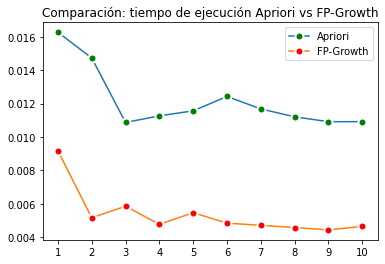

In [ ]:
# Definir número de ejecuciones:
numero_ejecuciones =  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
mapeado = range(len(numero_ejecuciones))

# Crear Plot para mostrar información del algoritmo Apriori:
plt.plot(arr_apriori, label="Apriori",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="green", markeredgecolor="white")

# Crear Plot para mostrar información del algoritmo FP-Growth:
plt.plot(arr_fpgrowth, label="FP-Growth",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="red", markeredgecolor="white")

# Dibujar diagrama
plt.title('Comparación: tiempo de ejecución Apriori vs FP-Growth')
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(mapeado, numero_ejecuciones)
plt.legend()
plt.show()

Como se puede apreciar en el cuadro 'Comparación: tiempo de ejecución Apriori vs FP-Growth' el algoritmo FP-Growth presenta mucho mejores resultados que el algoritmo Apriori, logrando un tiempo de ejecución mucho más bajo

### 2.2. Minería de conjuntos de elementos cerrados

Con el resultado de la comparación entre los algoritmos, ahora vamos a empezar a implemntar la detección de patrones para el proyecto.
Respecto a los hiperparametros, se ha elegido 10% par min_freq y 2 para min_size. Esta elección se hizo en función a la investigación que se realizo en el estado del Arte.
> Nota: se usa el algoritmo 'FP-Growth' porque es el que mejores resultados obtuve en la comparación realizada en el punto...





In [ ]:
def dataset_transaccional(transacciones):
  # Usar el algoritmos 'fpgrowth' para encontrar la frecuencia de cada itemset:
  frequent = fpgrowth(transacciones, target='c', supp=10, zmin=2) 

  # Generar un dataframe con informacion de cada itemset y su frecuencia respectiva:
  df = pd.DataFrame(frequent)
  df.columns = ['Itemset','Freq']

  # Ordenar dataframe de mayor a menor en función a la frecuencia.
  df.sort_values(by='Freq',ascending=False,inplace=True)
  
  return df

In [ ]:
df_itemsets = dataset_transaccional(itemsets)
df_itemsets.head(5)

,Itemset,Freq
2407,"(Papa blanca, Maiz amilaceo)",702
2403,"(Trigo, Cebada grano)",702
2408,"(Cebada grano, Maiz amilaceo)",701
2404,"(Trigo, Maiz amilaceo)",698
2396,"(Haba grano seco, Cebada grano)",661


Buscar todos los distritos en los que se cumple un mismo itemset de productos

In [ ]:
def buscar_distritos(x, labels, trans):
  # Arreglo para almacenar distritos:
  d = []

  # Buscar distritos para cada transacción:
  for i in range(len(trans)):
    if set(x).issubset(set(trans[i])):
      d += [labels[i]]

  return d

Juntar con el dataframe 'df_itemsets' la información sobre todos los distritos en los que se siembra un mismo itemset de productos

In [ ]:
def distritos_por_itemset(df, df_trans, trans_):
  # Variable para guardar el nombre de cada distrito:
  labels = df["DISTRITO"].unique()

  # Generar copia del dataframe de Itemsets:
  df_trans_ = df_trans.copy()

  # Agregar nueva columna al dataframe:
  df_trans_["Distritos"] = [buscar_distritos(x,labels,trans_) for x in df_trans_["Itemset"].tolist()]

  return df_trans_

In [ ]:
df_itemsets_distritos = distritos_por_itemset(dataset, df_itemsets, itemsets)
df_itemsets_distritos.head(5)

,Itemset,Freq,Distritos
2407,"(Papa blanca, Maiz amilaceo)",702,"[ANCASH-AIJA-SUCCHA, ANCASH-ANTONIO RAYMONDI-L..."
2403,"(Trigo, Cebada grano)",702,"[ANCASH-AIJA-SUCCHA, ANCASH-ANTONIO RAYMONDI-L..."
2408,"(Cebada grano, Maiz amilaceo)",701,"[ANCASH-AIJA-SUCCHA, ANCASH-ANTONIO RAYMONDI-L..."
2404,"(Trigo, Maiz amilaceo)",698,"[ANCASH-AIJA-SUCCHA, ANCASH-ANTONIO RAYMONDI-L..."
2396,"(Haba grano seco, Cebada grano)",661,"[ANCASH-AIJA-SUCCHA, ANCASH-ANTONIO RAYMONDI-L..."


### 2.3. Detección de REGLAS DE ASOCIACIÓN

Función que se encarga de generar las reglas de asociacion en funcion al dataset transaccional (itemsets)

In [ ]:
def reglas_asociacion(trans_):

  # Parametros de entrada para generar las reglas de asociación:
  supp = 2 # Minimo valor para el support (nro de items en cada itemset) (default: 10)
  conf = 80 # Minimo valor para la confianza (default: 80%)
  report = 'asC' # Parametro selecciondo en función a la investigación realizada en el estado del arte

  # Diccionario para generar nombres de la columnas:
  report_colnames = {
      'a': 'support_itemset_absolute',
      's': 'support_itemset_relative',
      'S': 'support_itemset_relative_pct',
      'b': 'support_bodyset_absolute',
      'x': 'support_bodyset_relative',
      'X': 'support_bodyset_relative_pct',
      'h': 'support_headitem_absolute',
      'y': 'support_headitem_relative',
      'Y': 'support_headitem_relative_pct',
      'c': 'confidence',
      'C': 'confidence_pct',
      'l': 'lift',
      'L': 'lift_pct',
      'e': 'evaluation',
      'E': 'evaluation_pct',
      'Q': 'xx',
      'S': 'support_emptyset',
      }

  # Resultado de las reglas de asociación: (arules --> función de pyFim)
  result = arules(trans_, supp=supp, conf=conf, report=report)

  # Convertir los resultados a un Dataframe:
  colnames = ['consequent', 'antecedent'] + [report_colnames.get(k, k) for k in list(report)]
  df_reglas = pd.DataFrame(result, columns=colnames)
  df_reglas = df_reglas.sort_values('support_itemset_absolute', ascending=False)
  return df_reglas

In [ ]:
df_reglas = reglas_asociacion(itemsets)
df_reglas.head()

,consequent,antecedent,support_itemset_absolute,support_itemset_relative,confidence_pct
1,Maiz amilaceo,"(Papa blanca,)",702,0.467066,90.815006
11,Trigo,"(Cebada grano,)",702,0.467066,87.531172
10,Cebada grano,"(Trigo,)",702,0.467066,92.857143
0,Maiz amilaceo,"(Cebada grano,)",701,0.466401,87.406484
6,Maiz amilaceo,"(Trigo,)",698,0.464405,92.328042


## **3) Simulación: Dibujar Mapa**

Importar librerias y Definir variables

In [ ]:
# Instalar la libreria Geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 16.7 MB 226 kB/s 
     |████████████████████████████████| 6.3 MB 44.9 MB/s 


In [ ]:
# Importar librerias:
import geopandas as gpd
from matplotlib.colors import ListedColormap
import io
import base64

# Variable para guardar información geoespacial de Perú:
url_geojson_distrital = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_distrital_simple.geojson"

# Generar un mapa de Peru resaltando todos sus Distritos:
region_geojson = gpd.read_file(url_geojson_distrital)
region_geojson["NOMBDIST"] = region_geojson["NOMBDEP"]+'-'+region_geojson["NOMBPROV"]+'-'+region_geojson["NOMBDIST"]

# Definir una paleta de colores para pintar el mapa:
my_palette = plt.cm.get_cmap("Set1",len(df_itemsets_distritos.index))

Dividir el mapa de Perú en todos sus distritos y pintar de un color todos los distritos en los que se cumpla un mismo itemset de productos

In [ ]:
def index_departamentos(df_,row):
  l = df_.loc[df_.index[row]].values[[-1]].tolist()[0]
  r = []
  for dist in l:
    v = list(region_geojson[region_geojson["NOMBDIST"] == dist]["OBJECTID"].values)
    if len(v) > 0:
      r.append(v[0])
  w = []
  for i in range(len(region_geojson.index)):
    if i in r:
      w += [my_palette(row)]
    else:
      w += ["white"]
  return w

Dibujar el mapa de Perú con las especificaciones definidas anteriormante

In [ ]:
def draw_map(df_,row):
    cmap = ListedColormap(index_departamentos(df_,row), name='allred')
    ax = region_geojson.plot(figsize=(14,14), edgecolor=u'gray', cmap=cmap)
    #ax.annotate("dsa",xy=(-80,0))
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    title = '\n'.join(str(df_[df_.columns[0]][df_.index[row]]).split(",")) + " " + str(df_[df_.columns[1]][df_.index[row]])
    plt.title(title, size=12,color=my_palette(row),y=1.01)
    #plt.show()
    return plt

### 3.1. Resultados de la Simulación

El resultado en esta sección es un mapa de todos los distritos de Perú, pintando de un color los distritos en los que se siembra un mismo dataset de productos.

Este resultado es una simulación de la intención de siembra de un itemset(conjunto de productos). Nos puede ayudar a visializar como se compone la disperción de un itemset de productos sobre el territorio peruano. En otras palabras, podremos ver si ciertos productos estan focalizados en algunas zonas.

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

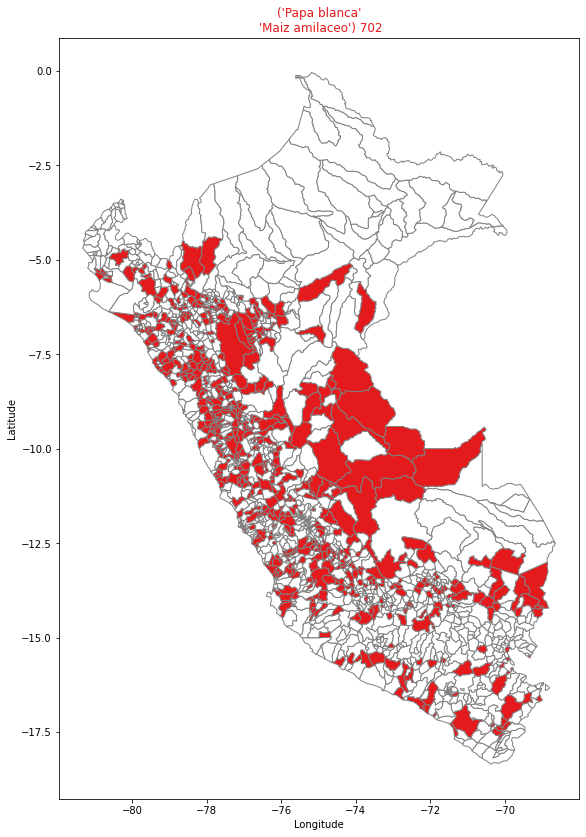

In [ ]:
# Mapa del Itemset con codigo(posición dentro del dataframe df_itemsets_distritos) 0:
cod_itemset = 0
draw_map(df_itemsets_distritos, cod_itemset)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

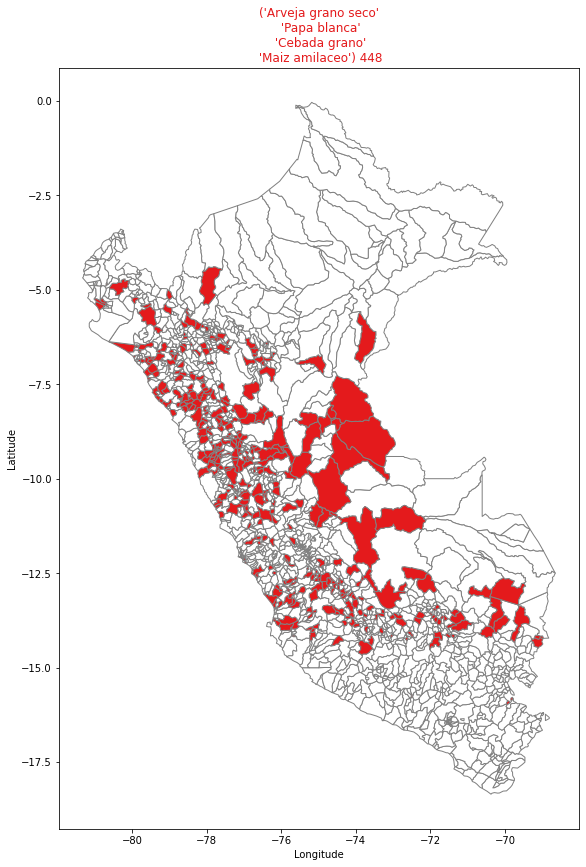

In [ ]:
# Mapa del Itemset con codigo(posición dentro del dataframe df_itemsets_distritos) 100:
cod_itemset = 100
draw_map(df_itemsets_distritos, cod_itemset)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

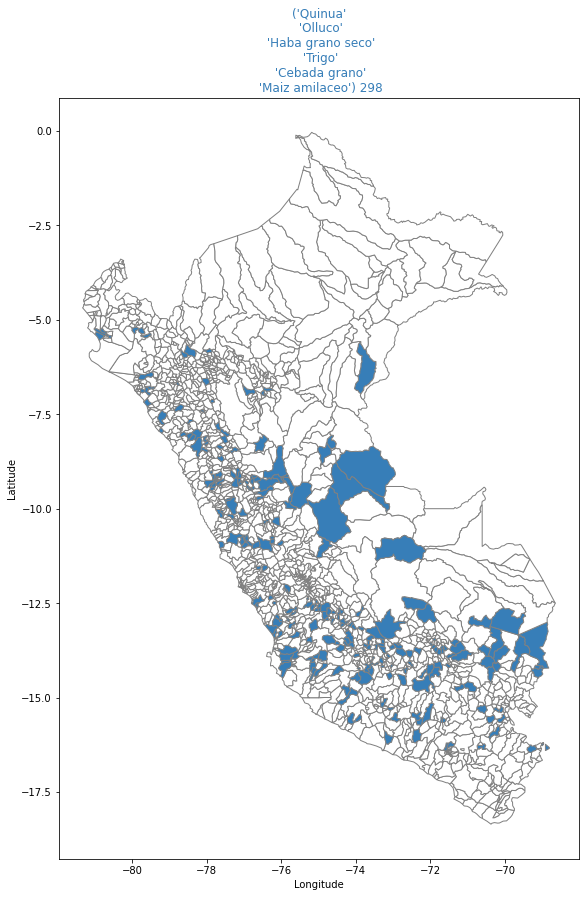

In [ ]:
# Mapa del Itemset con codigo(posición dentro del dataframe df_itemsets_distritos) 500:
cod_itemset = 500
draw_map(df_itemsets_distritos, cod_itemset)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

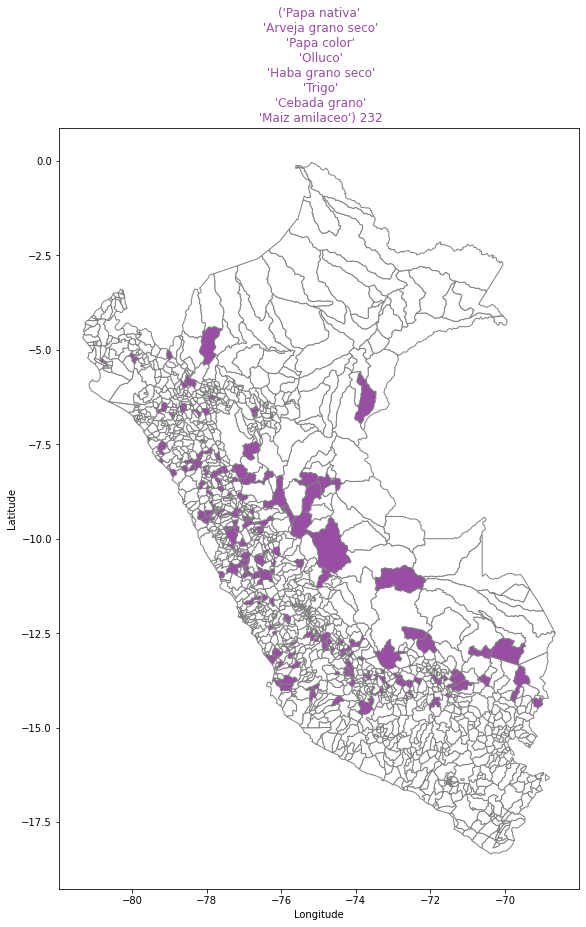

In [ ]:
# Mapa del Itemset con codigo(posición dentro del dataframe df_itemsets_distritos) 1000:
cod_itemset = 1000
draw_map(df_itemsets_distritos, cod_itemset)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

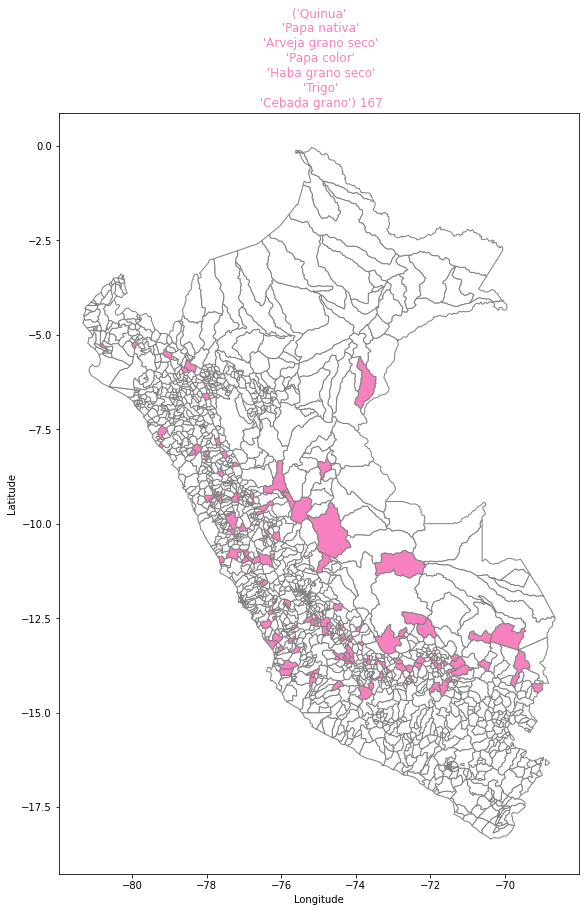

In [ ]:
# Mapa del Itemset con codigo(posición dentro del dataframe df_itemsets_distritos) 2000:
cod_itemset = 2000
draw_map(df_itemsets_distritos, cod_itemset)

## **4) Recomendación: Reglas de Asociación**

Función que ordena el dataframe de Reglas de Asociación de Mayor a Menor basándose en las que obtuviéron mayor porcentaje de Confianza

In [ ]:
def Reglas_Tabla_Ordenada(df_to_sort):
  
  df_to_sort = df_to_sort.sort_values(by='confidence_pct', ascending=False)

  con = df_to_sort['consequent'].to_numpy()
  ant = df_to_sort['antecedent'].to_numpy()
  sup_abs = df_to_sort['support_itemset_absolute'].to_numpy()
  sup_rel = df_to_sort['support_itemset_relative'].to_numpy()
  confi = df_to_sort['confidence_pct'].to_numpy()

  new_df_sort = pd.DataFrame(con, columns = ['consequent'])

  new_df_sort['antecedent'] = ant.tolist()
  new_df_sort['support_itemset_absolute'] = sup_abs.tolist()
  new_df_sort['support_itemset_relative'] = sup_rel.tolist()
  new_df_sort['confidence_pct'] = confi.tolist()

  return new_df_sort

Seleccionar las mejores Reglas de Asociación (en función a la métrica de Confianza)

In [ ]:
def Seleccionar_Mejores_Reglas(porcentage, data_sort):
  index = 0 

  for k in range(len(data_sort['confidence_pct'])):
    if data_sort['confidence_pct'][k] < porcentage:
      index = k
      break
  
  if index > 1:
    df_sort_mejores = data_sort.head(index)
  else:
    df_sort_mejores = data_sort

  return df_sort_mejores

Funciones que se encarga de buscar en todo el dataframe de Reglas de Asociación las Mejores Reglas

In [ ]:
def Buscar_Todo(nro_filas, tag):
  df_sort_mejores = Reglas_Tabla_Ordenada(data_reglas)

  consequent = []
  antecedent = []
  confidence = []

  for k in range(len(df_sort_mejores['consequent'])):

    if tag == df_sort_mejores['consequent'][k]:
      consequent.append(df_sort_mejores['consequent'][k])
      antecedent.append(df_sort_mejores['antecedent'][k])
      confidence.append(df_sort_mejores['confidence_pct'][k])

    if len(confidence) > nro_filas:
      ghgh = len(confidence)
      break

  return consequent, antecedent, confidence

In [ ]:
def Buscar_Reglas_Asociacion(tag, nro_filas, df_sort_mejores):
  consequent = []
  antecedent = []
  confidence = []

  nro_filas = nro_filas - 1

  for k in range(len(df_sort_mejores['consequent'])):

    if tag == df_sort_mejores['consequent'][k]:
      consequent.append(df_sort_mejores['consequent'][k])
      antecedent.append(df_sort_mejores['antecedent'][k])
      confidence.append(df_sort_mejores['confidence_pct'][k])

    if len(confidence) > nro_filas:
      ghgh = len(confidence)
      break
  
  mensaje = 'Resultados de la busqueda para el porcentaje deseado.'
  if consequent == []:
    mensaje = 'No se encontraron datos dentro del procentaje de busqueda. Se buscaran resultados sin importar el porcentaje.'
    consequent, antecedent, confidence = Buscar_Todo(nro_filas, tag)
  
  return consequent, antecedent, confidence, mensaje

Crear Nuevo dataframe con la información de las n mejores Reglas de Asociación


In [ ]:
def crear_tabla_resultados(consequent, antecedent, confidence):
  np_consequent = np.array(consequent)
  np_antecedent = np.array(antecedent)
  np_confidence = np.array(confidence)

  tabla_resultados_reglas = pd.DataFrame(np_consequent, columns = ['Consecuente'])
  tabla_resultados_reglas['Antecedente'] = np_antecedent.tolist()
  tabla_resultados_reglas['Confianza'] = np_confidence.tolist()

  return tabla_resultados_reglas

#### 4.1. Resultados Recomendación

Los resultados en esta sección se presentan como una tabla con información sobre las mejores Reglas de Asociación (en función a la métrica de Confianza) para un producto que nosotros ingresemos

Adicionalmente podremos seleccionar cual es el porcentaje minimo de confianza que deseamos ver y el número de Reglas de Asociación que deseamos ver.

La tabla generada con información sobre las mejores Reglas de Asociación para un producto nos puden ayudar a brindar una recomendación sobre sembar algun otro producto que compart itemset de Reglas con el producto seleccionado 

In [ ]:
# Tabla: Las 10(numero_reglas) mejores Reglas de Asociación para el producto TRIGO(nombre_producto) y que tengan un porcentage de confianza mayor al 90%(confianza_minima)
nombre_producto = 'Trigo'
numero_reglas = 10
confianza_minima = 90

consequent, antecedent, confidence, mensaje  = Buscar_Reglas_Asociacion(nombre_producto, numero_reglas, Seleccionar_Mejores_Reglas(confianza_minima, Reglas_Tabla_Ordenada(df_reglas)))

tabla_resultados = crear_tabla_resultados(consequent, antecedent, confidence)
tabla_resultados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


,Consecuente,Antecedente,Confianza
0,Trigo,"(Zanahoria, Quinua, Haba grano seco, Papa blan...",100.0
1,Trigo,"(Ajo, Maiz choclo, Papa nativa, Papa color, Ha...",100.0
2,Trigo,"(Cebolla cabeza roja, Quinua, Papa color, Ollu...",100.0
3,Trigo,"(Zapallo, Maiz choclo, Arveja grano verde, Pap...",100.0
4,Trigo,"(Yuca, Maiz amarillo duro, Maiz choclo, Arveja...",100.0
5,Trigo,"(Ajo, Papa color, Olluco, Haba grano seco, Ceb...",100.0
6,Trigo,"(Camote, Yuca, Maiz amarillo duro, Arveja gran...",100.0
7,Trigo,"(Yuca, Maiz amarillo duro, Arveja grano seco, ...",100.0
8,Trigo,"(Zapallo, Maiz amarillo duro, Olluco, Haba gra...",100.0
9,Trigo,"(Camote, Yuca, Olluco, Haba grano seco, Papa b...",100.0


In [ ]:
# Tabla: Las 5(numero_reglas) mejores Reglas de Asociación para el producto ARVEJA GRANO VERDE(nombre_producto) y que tengan un porcentage de confianza mayor al 85%(confianza_minima)
nombre_producto = 'Arveja grano verde'
numero_reglas = 5
confianza_minima = 85

consequent, antecedent, confidence, mensaje  = Buscar_Reglas_Asociacion(nombre_producto, numero_reglas, Seleccionar_Mejores_Reglas(confianza_minima, Reglas_Tabla_Ordenada(df_reglas)))

tabla_resultados = crear_tabla_resultados(consequent, antecedent, confidence)
tabla_resultados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


,Consecuente,Antecedente,Confianza
0,Arveja grano verde,"(Zapallo, Maiz amarillo duro, Maiz choclo, Arv...",100.0
1,Arveja grano verde,"(Zapallo, Maiz amarillo duro, Maiz choclo, Fri...",100.0
2,Arveja grano verde,"(Zapallo, Yuca, Maiz choclo, Arveja grano seco...",100.0
3,Arveja grano verde,"(Zapallo, Maiz amarillo duro, Maiz choclo, Fri...",100.0
4,Arveja grano verde,"(Zapallo, Maiz amarillo duro, Maiz choclo, Fri...",100.0


In [ ]:
# Tabla: Las 5(numero_reglas) mejores Reglas de Asociación para el producto PAPA NATIVA(nombre_producto) y que tengan un porcentage de confianza mayor al 85%(confianza_minima)
nombre_producto = 'Papa nativa'
numero_reglas = 5
confianza_minima = 85

consequent, antecedent, confidence, mensaje  = Buscar_Reglas_Asociacion(nombre_producto, numero_reglas, Seleccionar_Mejores_Reglas(confianza_minima, Reglas_Tabla_Ordenada(df_reglas)))

tabla_resultados = crear_tabla_resultados(consequent, antecedent, confidence)
tabla_resultados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


,Consecuente,Antecedente,Confianza
0,Papa nativa,"(Zanahoria, Zapallo, Papa color, Olluco, Haba ...",93.750000
1,Papa nativa,"(Zanahoria, Zapallo, Papa color, Olluco, Haba ...",93.750000
2,Papa nativa,"(Zanahoria, Zapallo, Papa color, Olluco, Trigo)",93.750000
3,Papa nativa,"(Zanahoria, Zapallo, Papa color, Olluco, Trigo...",93.750000
4,Papa nativa,"(Zanahoria, Zapallo, Papa color, Olluco, Trigo...",93.548387


## **5) Resultados**

### 5.1. Tiempo de Ejecución 

#### 5.1.1. Validación por Algoritmo [Tiempo]

Implementación de los 5 algoritmos que se van a validar:

In [ ]:
def dataset_transactionnal_apriori(trans_):
  r = apriori(trans_, target='c', supp=10, zmin=2)
  df = pd.DataFrame(r)
  df.columns = ['Itemset','Freq']
  df.sort_values(by='Freq',ascending=False,inplace=True)
  return df

def dataset_transactionnal_fpgrowth(trans_):
  r = fpgrowth(trans_, target='c', supp=10, zmin=2)
  df = pd.DataFrame(r)
  df.columns = ['Itemset','Freq']
  df.sort_values(by='Freq',ascending=False,inplace=True)
  return df

def dataset_transactionnal_eclat(trans_):
  r = eclat(trans_, target='c', supp=10, zmin=2)
  df = pd.DataFrame(r)
  df.columns = ['Itemset','Freq']
  df.sort_values(by='Freq',ascending=False,inplace=True)
  return df

def dataset_transactionnal_relim(trans_):
  r = relim(trans_, target='c', supp=10, zmin=2)
  df = pd.DataFrame(r)
  df.columns = ['Itemset','Freq']
  df.sort_values(by='Freq',ascending=False,inplace=True)
  return df

def dataset_transactionnal_sam(trans_):
  r = sam(trans_, target='c', supp=10, zmin=2)
  df = pd.DataFrame(r)
  df.columns = ['Itemset','Freq']
  df.sort_values(by='Freq',ascending=False,inplace=True)
  return df

**Validar Tiempo Apriori:**

In [ ]:
def tiempo_apriori(transaccional):
  start = time.time()
  data_transactionnal_a = dataset_transactionnal_apriori(transaccional)
  end = time.time()
  tiempo = end - start
  return tiempo

In [ ]:
print('El tiempo de procesamiento del algoritmo es de: ', tiempo_apriori(itemsets))

El tiempo de procesamiento del algoritmo es de:  0.02171492576599121


**Validar Tiempo FP-Growth:**

In [ ]:
def tiempo_fpgrowth(transaccional):
  start = time.time()
  data_transactionnal_fp = dataset_transactionnal_fpgrowth(transaccional)
  end = time.time()
  tiempo = end - start
  return tiempo

In [ ]:
print('El tiempo de procesamiento del algoritmo es de: ', tiempo_fpgrowth(itemsets))

El tiempo de procesamiento del algoritmo es de:  0.023009538650512695


**Validar Tiempo Eclat:**

In [ ]:
def tiempo_eclat(transaccional):
  start = time.time()
  data_transactionnal_e = dataset_transactionnal_eclat(transaccional)
  end = time.time()
  tiempo = end - start
  return tiempo

In [ ]:
print('El tiempo de procesamiento del algoritmo es de: ', tiempo_eclat(itemsets))

El tiempo de procesamiento del algoritmo es de:  0.026454925537109375


**Validar Tiempo RElim:**

In [ ]:
def tiempo_relim(transaccional):
  start = time.time()
  data_transactionnal_re = dataset_transactionnal_relim(transaccional)
  end = time.time()
  tiempo = end - start
  return tiempo

In [ ]:
print('El tiempo de procesamiento del algoritmo es de: ', tiempo_relim(itemsets))

El tiempo de procesamiento del algoritmo es de:  0.03795742988586426


**Validar Tiempo SaM:**

In [ ]:
def tiempo_sam(transaccional):
  start = time.time()
  data_transactionnal_s = dataset_transactionnal_sam(transaccional)
  end = time.time()
  tiempo = end - start
  return tiempo

In [ ]:
print('El tiempo de procesamiento del algoritmo es de: ', tiempo_sam(itemsets))

El tiempo de procesamiento del algoritmo es de:  0.017200469970703125


#### 5.1.2. Comparativa Tiempo: por Algoritmo

In [ ]:
def repetir_ejecuciones(n, transaccional_):

  # Definir arreglos x algoritmo:
  arr_apriori = []
  arr_fpgrowth = []
  arr_eclat = []
  arr_relim = []
  arr_sam = []

  # Repetir Proceso n veces:
  for k in range(n):
    arr_apriori.append(tiempo_apriori(transaccional_))
    arr_fpgrowth.append(tiempo_fpgrowth(transaccional_))
    arr_eclat.append(tiempo_eclat(transaccional_))
    arr_relim.append(tiempo_relim(transaccional_))
    arr_sam.append(tiempo_sam(transaccional_))

  # Retornar los arreglos:
  return arr_apriori, arr_fpgrowth, arr_eclat, arr_relim, arr_sam

In [ ]:
arr_apriori, arr_fpgrowth, arr_eclat, arr_relim, arr_sam = repetir_ejecuciones(10, itemsets)

TIEMPO PROMEDIO:

In [ ]:
import statistics

promedio_apriori = statistics.mean(arr_apriori)
print('Promedio Apriori = ', promedio_apriori)

promedio_fpgrowth = statistics.mean(arr_fpgrowth)
print('Promedio FP-Growth = ', promedio_fpgrowth)

promedio_eclat = statistics.mean(arr_eclat)
print('Promedio Eclat = ', promedio_eclat)

promedio_relim = statistics.mean(arr_relim)
print('Promedio Relim = ', promedio_relim)

promedio_sam = statistics.mean(arr_sam)
print('Promedio Sam = ', promedio_sam)

Promedio Apriori =  0.033170461654663086
Promedio FP-Growth =  0.021805548667907716
Promedio Eclat =  0.017930269241333008
Promedio Relim =  0.015293741226196289
Promedio Sam =  0.017222261428833006


Grafica Comparativa de Tiempo de Ejecución con 5 Algoritmos

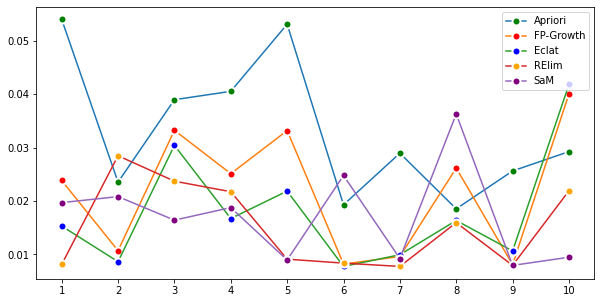

In [ ]:
numero_ejecuciones =  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
mapeado = range(len(numero_ejecuciones))

plt.plot(arr_apriori, label="Apriori",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="green", markeredgecolor="white")

plt.plot(arr_fpgrowth, label="FP-Growth",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="red", markeredgecolor="white")

plt.plot(arr_eclat, label="Eclat",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="blue", markeredgecolor="white")

plt.plot(arr_relim, label="RElim",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="orange", markeredgecolor="white")

plt.plot(arr_sam, label="SaM",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="purple", markeredgecolor="white")

plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(mapeado, numero_ejecuciones)
plt.legend()
plt.show()

Grafica Comparativa de Tiempo de Ejecución entre los 4 Mejores Algoritmos

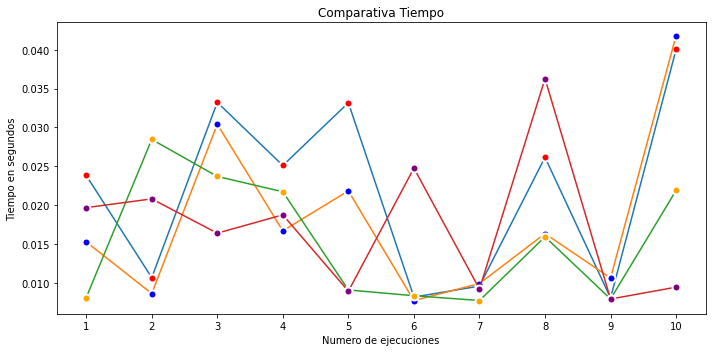

In [ ]:
numero_ejecuciones =  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
mapeado = range(len(numero_ejecuciones))

fig, ax = plt.subplots()

plt.plot(arr_fpgrowth, label="FP-Growth",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="red", markeredgecolor="white")

plt.plot(arr_eclat, label="Eclat",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="blue", markeredgecolor="white")

plt.plot(arr_relim, label="RElim",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="orange", markeredgecolor="white")

plt.plot(arr_sam, label="SaM",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="purple", markeredgecolor="white")

ax.set_xlabel('Numero de ejecuciones')
ax.set_ylabel('Tiempo en segundos')
ax.set_title(r'Comparativa Tiempo')
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.xticks(mapeado, numero_ejecuciones)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

INGLES

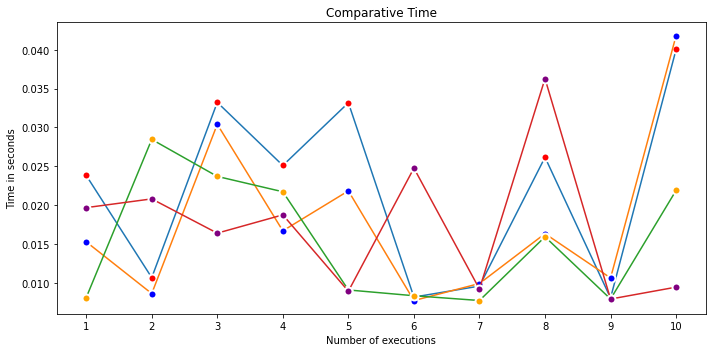

In [ ]:
numero_ejecuciones =  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
mapeado = range(len(numero_ejecuciones))

fig, ax = plt.subplots()

plt.plot(arr_fpgrowth, label="FP-Growth",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="red", markeredgecolor="white")

plt.plot(arr_eclat, label="Eclat",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="blue", markeredgecolor="white")

plt.plot(arr_relim, label="RElim",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="orange", markeredgecolor="white")

plt.plot(arr_sam, label="SaM",
         marker="o", markersize="8", markeredgewidth="2",
         markerfacecolor="purple", markeredgecolor="white")

ax.set_xlabel('Number of executions')
ax.set_ylabel('Time in seconds')
ax.set_title(r'Comparative Time')
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.xticks(mapeado, numero_ejecuciones)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()


### 5.2. Métrica: Confianza

#### 5.2.1. Validar Confianza

Convertir valores float a int:

In [ ]:
df_reglas['confidence_pct'] = df_reglas['confidence_pct'].astype('int')

#### 5.2.2. Graficar Histograma Confianza
 


In [ ]:
mu = df_reglas['confidence_pct'].mean()  # mean of distribution
print('Media de distribucion: ', mu)
sigma = df_reglas['confidence_pct'].std()  # standard deviation of distribution
print('Desviación Estándar de la distribución: ', sigma)

Media de distribucion:  91.72875697596888
Desviación Estándar de la distribución:  6.172715279016408


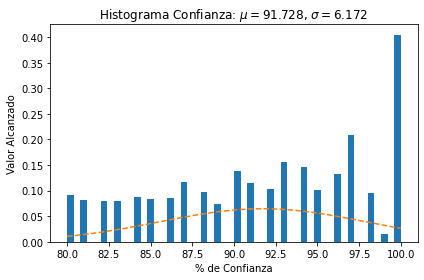

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# example data
x = df_reglas['confidence_pct']

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('% de Confianza')
ax.set_ylabel('Valor Alcanzado')
ax.set_title(r'Histograma Confianza: $\mu=91.728$, $\sigma=6.172$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

Ingles

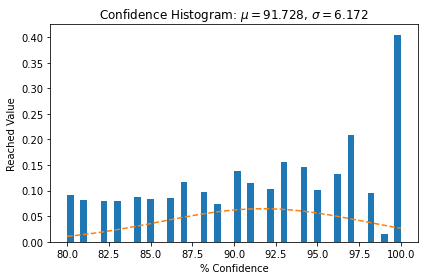

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# example data
x = df_reglas['confidence_pct']

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('% Confidence')
ax.set_ylabel('Reached Value')
ax.set_title(r'Confidence Histogram: $\mu=91.728$, $\sigma=6.172$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

### 5.3. Histograma Frecuencia

Determinar numero de items de cada Itemset

In [ ]:
nro_items = []
items = 0
for k in range(len(df_itemsets['Itemset'])):
  for i in range(len(df_itemsets['Itemset'][k])):
    items = i + 1
  nro_items.append(items)

Ordenar Dataset por el índice

In [ ]:
data_transactionnal = df_itemsets.sort_index()

Agregar la Columna 'Nro_Items' al Dataset

In [ ]:
np_nro_items = np.array(nro_items)
data_transactionnal['Nro_Items'] = np_nro_items.tolist()
data_transactionnal.head()

,Itemset,Freq,Nro_Items
0,"(Arroz cascara, Yuca, Maiz amarillo duro, Frij...",235,4
1,"(Arroz cascara, Yuca, Maiz amarillo duro)",262,3
2,"(Arroz cascara, Yuca, Frijol grano seco)",237,3
3,"(Arroz cascara, Yuca)",267,2
4,"(Arroz cascara, Maiz amarillo duro, Frijol gra...",245,3


HISTOGRAMA Frecuencia:

In [ ]:
mu = data_transactionnal['Freq'].mean()  # mean of distribution
print('Media de distribucion: ', mu)
sigma = data_transactionnal['Freq'].std()  # standard deviation of distribution
print('Desviación Estándar de la distribución: ', sigma)

Media de distribucion:  242.94935657949355
Desviación Estándar de la distribución:  90.43645972798997


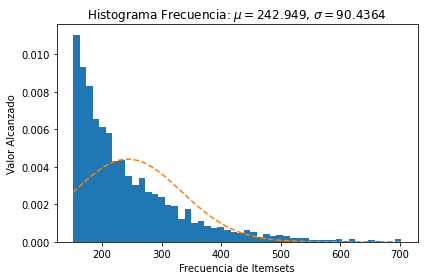

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# example data
x = data_transactionnal['Freq']

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Frecuencia de Itemsets')
ax.set_ylabel('Valor Alcanzado')
ax.set_title(r'Histograma Frecuencia: $\mu=242.949$, $\sigma=90.4364$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

Ingles

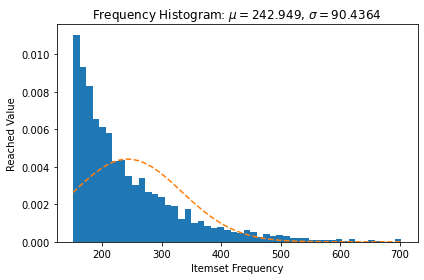

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# example data
x = data_transactionnal['Freq']

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Itemset Frequency')
ax.set_ylabel('Reached Value')
ax.set_title(r'Frequency Histogram: $\mu=242.949$, $\sigma=90.4364$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

### 5.4. Histograma Items por Itemset

In [ ]:
mu = data_transactionnal['Nro_Items'].mean()  # mean of distribution
print('Media de distribucion: ', mu)
sigma = data_transactionnal['Nro_Items'].std()  # standard deviation of distribution
print('Desviación Estándar de la distribución: ', sigma)

Media de distribucion:  5.011207970112079
Desviación Estándar de la distribución:  1.4653667044150458


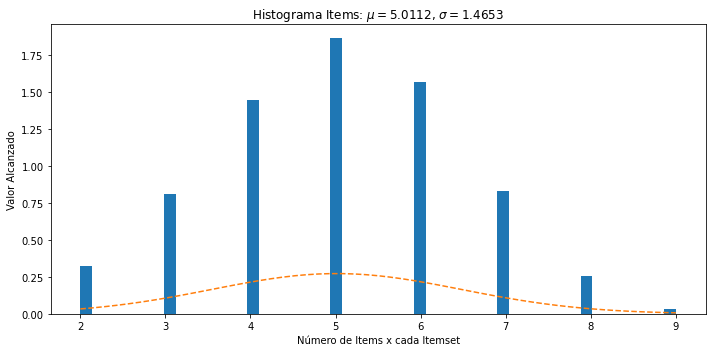

In [ ]:
x = data_transactionnal['Nro_Items']

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Número de Items x cada Itemset')
ax.set_ylabel('Valor Alcanzado')
ax.set_title(r'Histograma Items: $\mu=5.0112$, $\sigma=1.4653$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

Texto

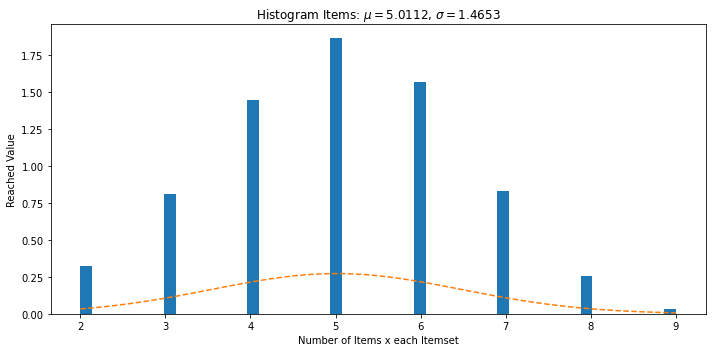

In [ ]:
x = data_transactionnal['Nro_Items']

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Number of Items x each Itemset')
ax.set_ylabel('Reached Value')
ax.set_title(r'Histogram Items: $\mu=5.0112$, $\sigma=1.4653$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()